<a href="https://colab.research.google.com/github/Sajid-Mahir/Humor_Emotion_Detection_Basic_ML/blob/master/422_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/422 Project/memotion_dataset_7k/labels.csv')
df.head(10)

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral
5,5,image_6.jpg,"1998: ""Don't get in car with strangers"" 2008: ...","1998: ""Don't get in car with strangers"" 2008: ...",hilarious,general,slight,motivational,negative
6,6,image_7.png,10 years challenge is lit af Üs & B erg 1945 1...,10 years challenge is lit af Üs & B erg 1945 1...,not_funny,not_sarcastic,not_offensive,not_motivational,negative
7,7,image_8.jpg,10 Year Challenge emotional edition boredpanda...,10 Year Challenge emotional edition boredpanda...,very_funny,twisted_meaning,not_offensive,not_motivational,neutral
8,8,image_9.jpg,Fornite died in 10 months but Minecraft never ...,Fornite died in 10 months but Minecraft never ...,funny,not_sarcastic,slight,motivational,positive
9,9,image_10.png,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,funny,general,slight,motivational,positive


In [ ]:
df.shape

(6992, 9)

In [ ]:
df.sample

<bound method NDFrame.sample of       Unnamed: 0      image_name  \
0              0     image_1.jpg   
1              1    image_2.jpeg   
2              2     image_3.JPG   
3              3     image_4.png   
4              4     image_5.png   
...          ...             ...   
6987        6987  image_6988.jpg   
6988        6988  image_6989.jpg   
6989        6989  image_6990.png   
6990        6990  image_6991.jpg   
6991        6991  image_6992.jpg   

                                               text_ocr  \
0     LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...   
1     The best of #10 YearChallenge! Completed in le...   
2     Sam Thorne @Strippin ( Follow Follow Saw every...   
3                 10 Year Challenge - Sweet Dee Edition   
4     10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...   
...                                                 ...   
6987  Tuesday is Mardi Gras Wednesday is Valentine's...   
6988  MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...   
6989

In [ ]:
df.describe(include=object)

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
count,6992,6831,6987,6992,6992,6992,6992,6992
unique,6992,6645,6939,4,4,4,2,5
top,image_1.jpg,"<html><head><meta content=""text/html; charset=...","<html><head><meta content=""text/html; charset=...",funny,general,not_offensive,not_motivational,positive
freq,1,104,5,2452,3507,2713,4525,3127


In [ ]:
df.isnull().sum()

Unnamed: 0             0
image_name             0
text_ocr             161
text_corrected         5
humour                 0
sarcasm                0
offensive              0
motivational           0
overall_sentiment      0
dtype: int64

In [ ]:
df = df.drop(['text_ocr', 'image_name'], axis = 1)
df = df.drop(df.columns[0], axis=1)
df.shape

(6992, 6)

In [ ]:
mode_text = df['text_corrected'].mode()[0]
df['text_corrected'].fillna(mode_text, inplace=True)
df.shape

(6992, 6)

In [ ]:
def preprocess_text(df):
  df['text_corrected']=df['text_corrected'].str.lower()
  df['text_corrected'].replace(to_replace=r'\w+.com[\w\W]*',value=' ',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace=r'\w+.net ',value=' ',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace=r'\w+.co[\w\W]*',value=' ',regex=True, inplace=True)
  df['text_corrected'].replace(to_replace=r'\w*https://\w+',value='',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace=r'\w*http://\w+',value=' ',regex=True, inplace=True)
  df['text_corrected'].replace(to_replace=r'\w+.mobi ',value=' ',regex=True, inplace=True)
  df['text_corrected'].replace(to_replace=r'\w+.es ',value=' ',regex=True, inplace=True)
  df['text_corrected'].replace(to_replace=r'\w*www\w+',value=' ',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace=r'\w+.in ',value=' ',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace=r'via',value=' ',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace=r'\w*@\w+',value=' ',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace=r'\w+.updates ',value=' ',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace=r'\w+.strangely ',value=' ',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace=r'\w+.eu',value=' ',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace=r'\w+.lower',value=' ',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace=r'\w+.org',value=' ',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace=r'\w+.com/\w+',value=' ',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace=r'memecenter',value=' ',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace=r'\w+.xyz',value=' ',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace=r'\w+.book',value=' ',regex=True,inplace=True)
  df['text_corrected'].replace(to_replace='[^\w\s]',value='',regex=True,inplace=True)
  return df
df=preprocess_text(df)
df.head(10)

,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,look there my friend lightyear now all sohalik...,hilarious,general,not_offensive,not_motivational,very_positive
1,the best of 10 yearchallenge less the 4 years...,not_funny,general,not_offensive,motivational,very_positive
2,sam thorne follow follow saw everyone postin...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,10 year challenge sweet dee edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,10 year challenge with no filter 47 hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral
5,1998 dont car with strangers 2008 dont meet p...,hilarious,general,slight,motivational,negative
6,10 years challenge is lit af üs b erg 1945 19...,not_funny,not_sarcastic,not_offensive,not_motivational,negative
7,10 year challenge emotional edition,very_funny,twisted_meaning,not_offensive,not_motivational,neutral
8,fornite 10 months but minecraft never 10 yea...,funny,not_sarcastic,slight,motivational,positive
9,10 year challenge a ploy or a simple meme mo...,funny,general,slight,motivational,positive


In [ ]:
unique_values = df['humour'].unique()
print(unique_values)

['hilarious' 'not_funny' 'very_funny' 'funny']


In [ ]:
label_encoder = LabelEncoder()
df['en_humor'] = label_encoder.fit_transform(df['humour'])

In [ ]:
unique_values = df['sarcasm'].unique()
print(unique_values)
df['en_sarcasm'] = label_encoder.fit_transform(df['sarcasm'])

['general' 'not_sarcastic' 'twisted_meaning' 'very_twisted']


In [ ]:
unique_values = df['motivational'].unique()
print(unique_values)
df['en_motivational'] = label_encoder.fit_transform(df['motivational'])

['not_motivational' 'motivational']


In [ ]:
unique_values = df['offensive'].unique()
print(unique_values)
df['en_offensive'] = label_encoder.fit_transform(df['offensive'])

['not_offensive' 'very_offensive' 'slight' 'hateful_offensive']


In [ ]:
unique_values = df['overall_sentiment'].unique()
print(unique_values)
df['en_overall_sentiment'] = label_encoder.fit_transform(df['overall_sentiment'])
df.head(10)

['very_positive' 'positive' 'neutral' 'negative' 'very_negative']


,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment,en_humor,en_sarcasm,en_motivational,en_offensive,en_overall_sentiment
0,look there my friend lightyear now all sohalik...,hilarious,general,not_offensive,not_motivational,very_positive,1,0,1,1,4
1,the best of 10 yearchallenge less the 4 years...,not_funny,general,not_offensive,motivational,very_positive,2,0,0,1,4
2,sam thorne follow follow saw everyone postin...,very_funny,not_sarcastic,not_offensive,not_motivational,positive,3,1,1,1,2
3,10 year challenge sweet dee edition,very_funny,twisted_meaning,very_offensive,motivational,positive,3,2,0,3,2
4,10 year challenge with no filter 47 hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral,1,3,1,3,1
5,1998 dont car with strangers 2008 dont meet p...,hilarious,general,slight,motivational,negative,1,0,0,2,0
6,10 years challenge is lit af üs b erg 1945 19...,not_funny,not_sarcastic,not_offensive,not_motivational,negative,2,1,1,1,0
7,10 year challenge emotional edition,very_funny,twisted_meaning,not_offensive,not_motivational,neutral,3,2,1,1,1
8,fornite 10 months but minecraft never 10 yea...,funny,not_sarcastic,slight,motivational,positive,0,1,0,2,2
9,10 year challenge a ploy or a simple meme mo...,funny,general,slight,motivational,positive,0,0,0,2,2


In [ ]:
X = df[['en_humor', 'en_sarcasm', 'en_motivational', 'en_offensive']]
y = df['en_overall_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Initialize models
decision_tree_model = DecisionTreeClassifier(random_state=42)
logistic_regression_model = LogisticRegression(random_state=42)
naive_bayes_model = MultinomialNB()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
svm_classifier = SVC(kernel='linear', C=1.0)

# Train models
decision_tree_model.fit(X_train_scaled, y_train)
logistic_regression_model.fit(X_train_scaled, y_train)
naive_bayes_model.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)


# Make predictions
y_pred_dt = decision_tree_model.predict(X_test_scaled)
y_pred_lr = logistic_regression_model.predict(X_test_scaled)
y_pred_nb = naive_bayes_model.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')
print("DT")
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

nprecision = precision_score(y_test, y_pred_nb, average='weighted')
nrecall = recall_score(y_test, y_pred_nb, average='weighted')
nf1 = f1_score(y_test, y_pred_nb, average='weighted')
print("NB")
print(f'Precision: {nprecision}')
print(f'Recall: {nrecall}')
print(f'F1 Score: {nf1}')

sprecision = precision_score(y_test, y_pred_svm, average='weighted')
srecall = recall_score(y_test, y_pred_svm, average='weighted')
sf1 = f1_score(y_test, y_pred_svm, average='weighted')
print("SVM")
print(f'Precision: {sprecision}')
print(f'Recall: {srecall}')
print(f'F1 Score: {sf1}')

# print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
# print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
# print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
# print(f"KNN Accuracy: {accuracy_knn:.4f}")
# print(f"SVM Accuracy: {accuracy_svm:.4f}")

DT
Precision: 0.44796096624215404
Recall: 0.4753395282344532
F1 Score: 0.42077023494733584
NB
Precision: 0.32794396362823963
Recall: 0.4395997140814868
F1 Score: 0.27261851604271814
SVM
Precision: 0.19136716157410508
Recall: 0.4374553252323088
F1 Score: 0.2662582387291626


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


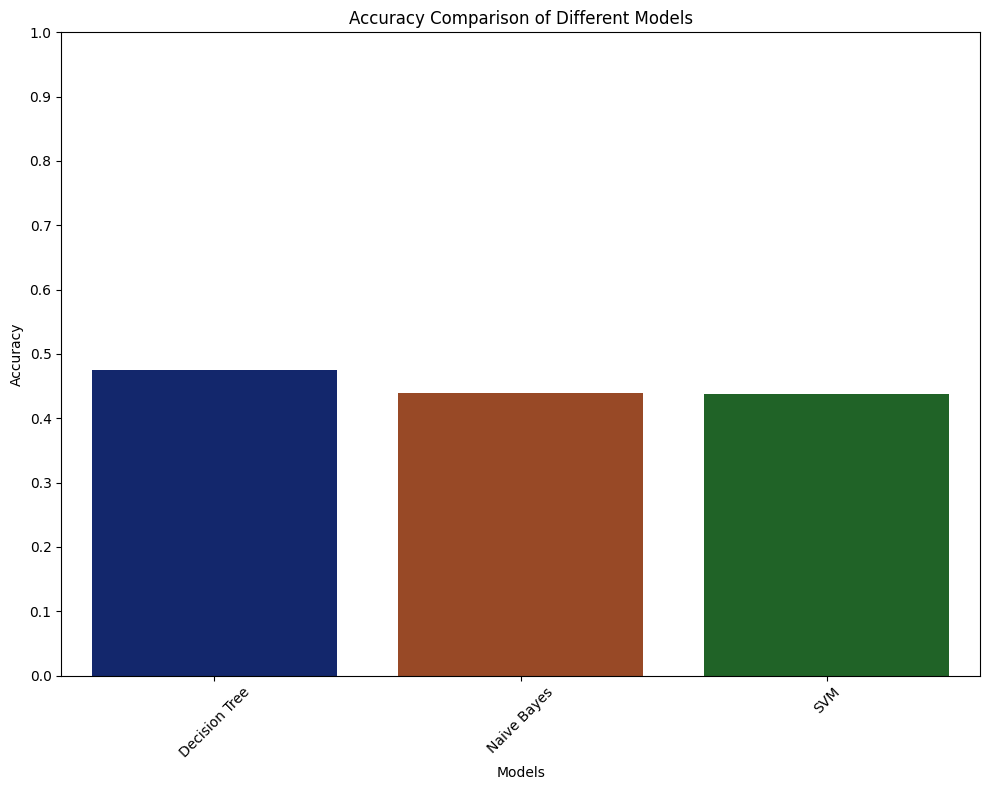

Best Fittable Model: Decision Tree
Worst Fittable Model: SVM


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_scores = {
    "Decision Tree": accuracy_dt,
    #"Logistic Regression": accuracy_lr,
    "Naive Bayes": accuracy_nb,
    #"KNN": accuracy_knn,
    "SVM": accuracy_svm
}

sns.set_palette("dark")

plt.figure(figsize=(10, 8))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), saturation=0.7)
plt.title("Accuracy Comparison of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.yticks([i * 0.1 for i in range(11)])  # Set y-axis ticks for every 0.1
plt.xticks(rotation=45)
plt.tight_layout()  # To prevent clipping of labels
plt.show()

best_model = max(accuracy_scores, key=accuracy_scores.get)
worst_model = min(accuracy_scores, key=accuracy_scores.get)

print(f"Best Fittable Model: {best_model}")
print(f"Worst Fittable Model: {worst_model}")




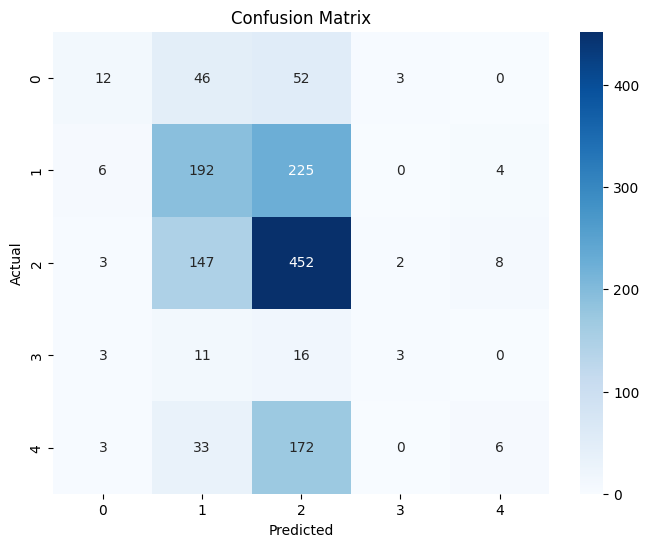

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



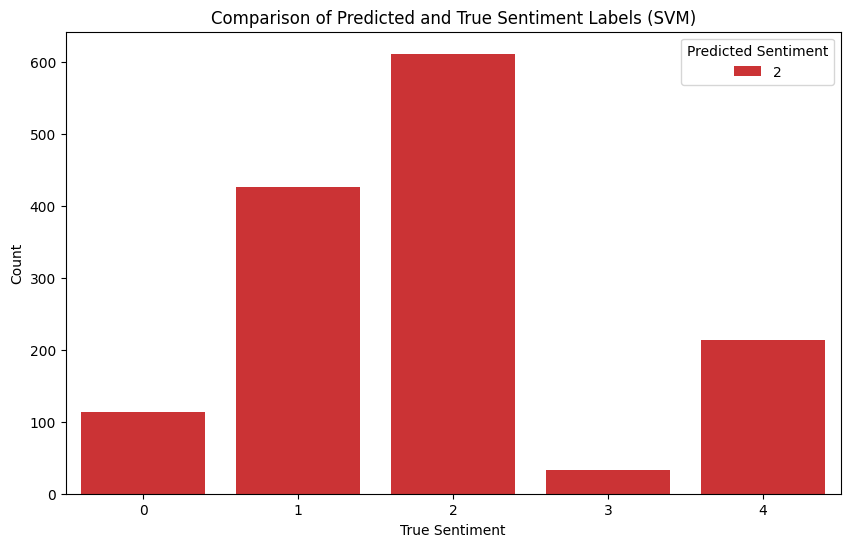

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, hue=y_pred_svm, palette="Set1")
plt.title("Comparison of Predicted and True Sentiment Labels (SVM)")
plt.xlabel("True Sentiment")
plt.ylabel("Count")
plt.legend(title="Predicted Sentiment")
plt.show()


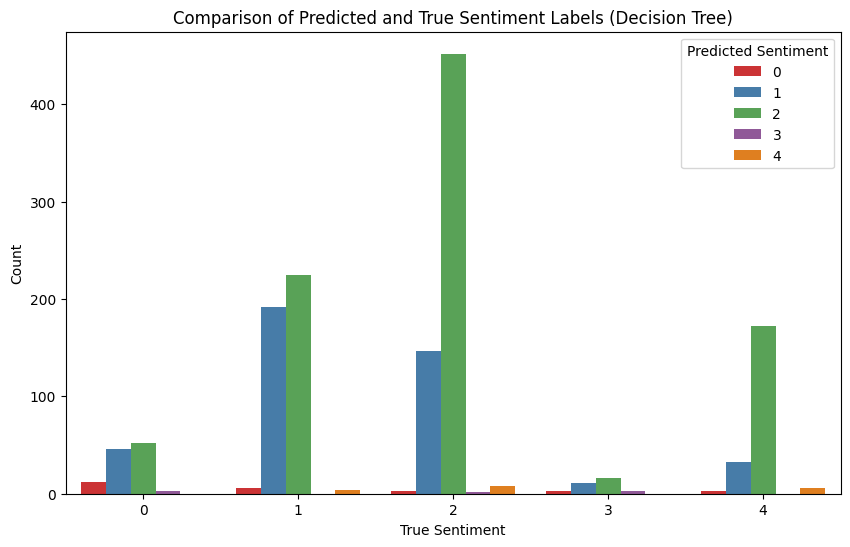

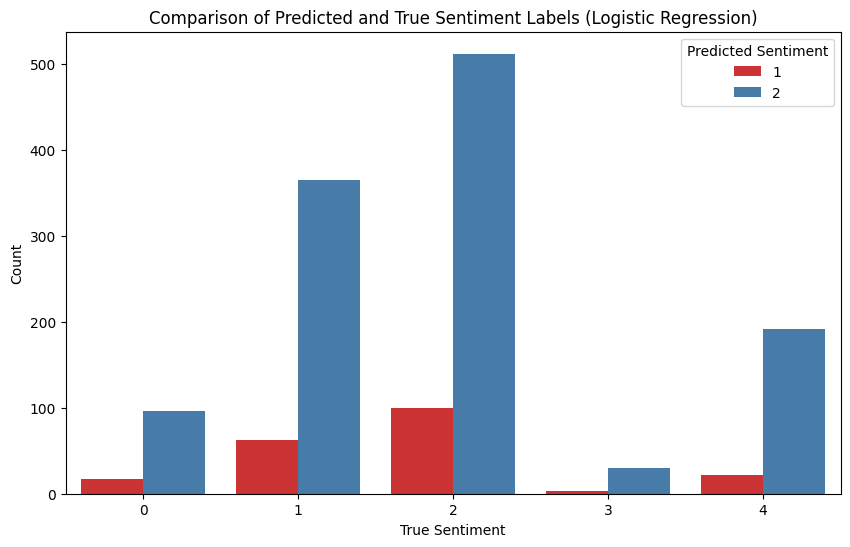

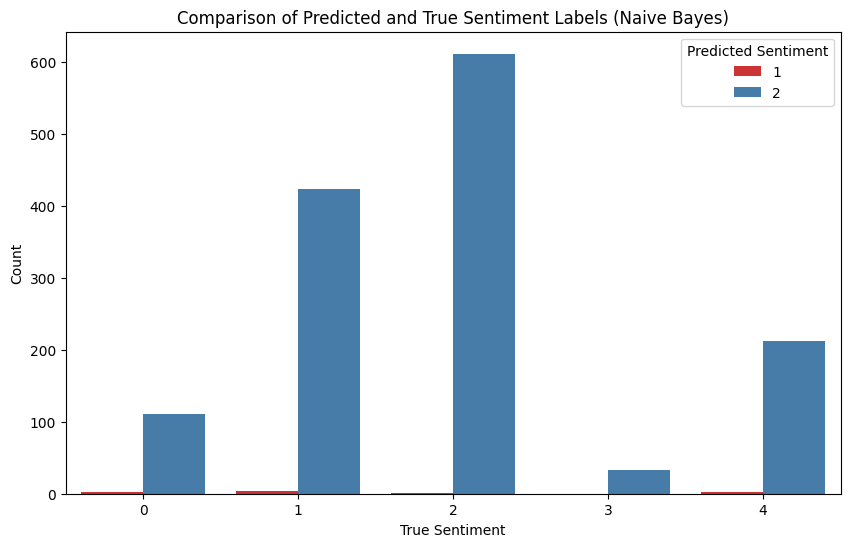

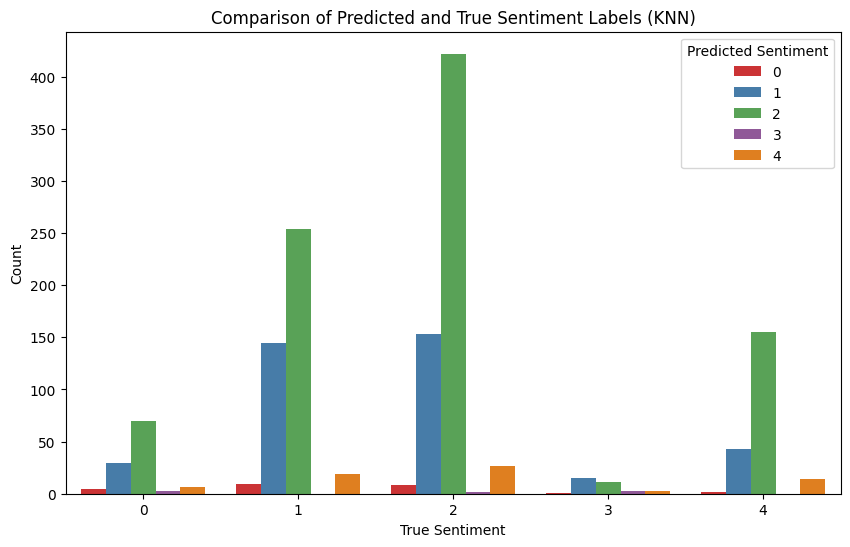

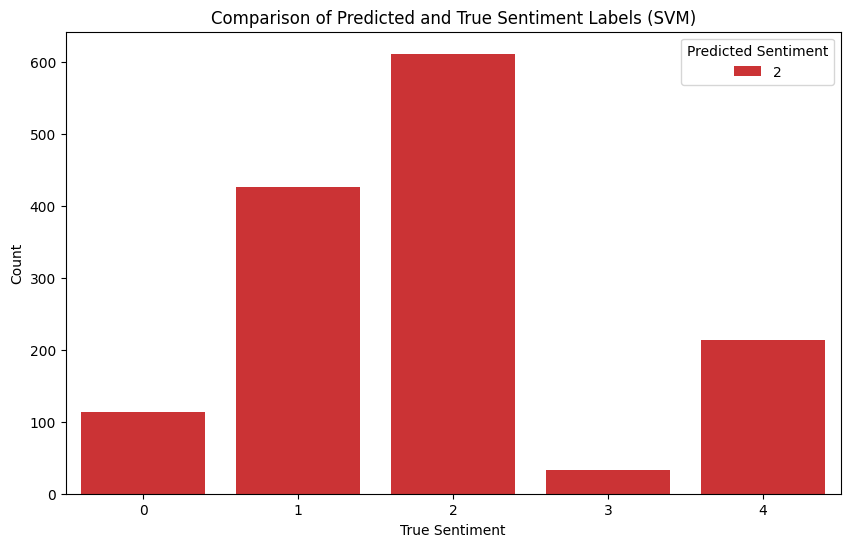

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = ['Decision Tree', 'Logistic Regression', 'Naive Bayes', 'KNN', 'SVM']
predictions = [y_pred_dt, y_pred_lr, y_pred_nb, y_pred_knn, y_pred_svm]

for model_name, prediction in zip(models, predictions):
    conf_matrix = confusion_matrix(y_test, prediction)
    plt.figure(figsize=(10, 6))
    sns.countplot(x=y_test, hue=prediction, palette="Set1")
    plt.title(f"Comparison of Predicted and True Sentiment Labels ({model_name})")
    plt.xlabel("True Sentiment")
    plt.ylabel("Count")
    plt.legend(title="Predicted Sentiment")
    plt.show()


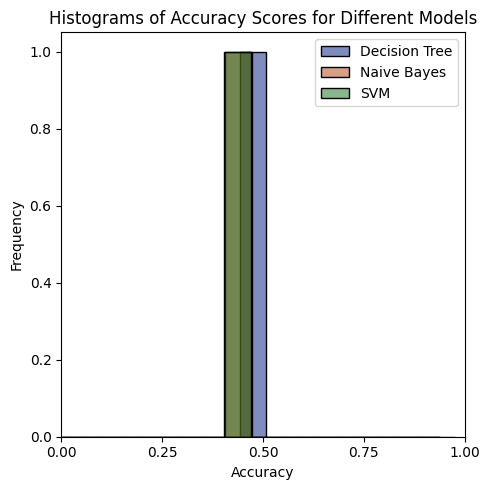

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


accuracy_scores = {
    "Decision Tree": accuracy_dt,
    "Naive Bayes": accuracy_nb,
    "SVM": accuracy_svm
}


sns.set_palette("dark")

plt.figure(figsize=(5, 5))
for model_name, accuracy in accuracy_scores.items():
    sns.histplot(np.array([accuracy]), label=model_name, kde=True, bins=15)

plt.title("Histograms of Accuracy Scores for Different Models")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.xticks([i * 0.25 for i in range(11)])
plt.xlim(0, 1.0)
plt.tight_layout()
plt.show()
